# POS IESB 2020 - Disciplina Fundamentos de IA
# Projeto Final

## Aluno: Eduardo Gomes Piza
## Aluno: Valter Takechi Hada

### Informações: Utilizamos um dos datasets constantes no site "archive.ics.uci/edu" (conforme sugestão) cujo conteúdo está relacionado a "Predict whether income exceeds US 50K/yr based on census data" (dados para estimar se um trabalhador possui renda anual superior a US 50.000). 

### Dados adicionais quanto ao dataset e arquivo .csv podem ser verificados através da url "http://archive.ics.uci.edu/ml/datasets/Adult"

### O dataset foi gerado a partir de informações extraídas por Berry Becker do CENSO realizado em 1994, tendo usado critérios a idade da pessoa ser superior a 16 anos e quantidade de horas trabalhadas semanalmente ser superior a 0 (dentre outros critérios).

In [1]:
# Passo 1
# Vamos importar o dataset com os dados que serão utilizados no treinamento

import pandas as pd

uri = "adult_without_null.csv"
#uri = "https://github.com/EduPiza/POS_IESB_FUND_IA/blob/master/adult_without_null.csv"
dados_input_treino = pd.read_csv(uri)
dados_input_treino.head()

,Idade,Tipo_emprego,Peso_socio_ecn,Instrucao,Cod_instr,Estado_civil,Ocupacao,Moradia,Raca,Sexo,Ganho_capital,Perda_capital,Horas_trab_semanais,Pais_origem,Renda
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
# Passo 2
# Como não havia "cabecalho" no arquivo original durante o pré processamento ainda na planilha
# os termos foram incluídos, já em nosso idioma.
# 
# Vamos atualizar o conteudo das linhas, transformando o conteúdo em números: 

import numpy as np

# tipo emprego
converte_tipo_emprego = { "Federal-gov"      : 0,
                          "Local-gov"        : 1,
                          "Private"          : 2,
                          "Self-emp-inc"     : 3,
                          "Self-emp-not-inc" : 4,
                          "State-gov"        : 5, 
                          "Without-pay"      : 6 }

dados_input_treino['Tipo_emprego'] = dados_input_treino.Tipo_emprego.map(converte_tipo_emprego)
dados_input_treino['Tipo_emprego'] = dados_input_treino['Tipo_emprego'].astype(np.uint32)


# instrucao
converte_instrucao = { "Preschool"      : 1,
                       "1st-4th"        : 2,
                       "5th-6th"        : 3,
                       "7th-8th"        : 4,
                       "9th"            : 5,
                       "10th"           : 6, 
                       "11th"           : 7,
                       "12th"           : 8, 
                       "HS-grad"        : 9,
                       "Some-college"   : 10, 
                       "Assoc-voc"      : 11,
                       "Assoc-acdm"     : 12,
                       "Bachelors"      : 13, 
                       "Masters"        : 14, 
                       "Prof-school"    : 15,
                       "Doctorate"      : 16 }

dados_input_treino['Instrucao'] = dados_input_treino.Instrucao.map(converte_instrucao)
dados_input_treino['Instrucao'] = dados_input_treino['Instrucao'].astype(np.uint32)

# estado civil
converte_estado_civil = { "Divorced"              : 0,
                          "Married-AF-spouse"     : 1,
                          "Married-civ-spouse"    : 2,
                          "Married-spouse-absent" : 3, 
                          "Never-married"         : 4,
                          "Separated"             : 5, 
                          "Widowed"               : 6 }

dados_input_treino['Estado_civil'] = dados_input_treino.Estado_civil.map(converte_estado_civil)
dados_input_treino['Estado_civil'] = dados_input_treino['Estado_civil'].astype(np.uint8)

# ocupacao
converte_ocupacao = { "Adm-clerical"      : 0 ,
                      "Armed-Forces"      : 1 , 
                      "Craft-repair"      : 2 ,
                      "Exec-managerial"   : 3 , 
                      "Farming-fishing"   : 4 , 
                      "Handlers-cleaners" : 5 , 
                      "Machine-op-inspct" : 6 , 
                      "Other-service"     : 7 , 
                      "Priv-house-serv"   : 8 , 
                      "Prof-specialty"    : 9 , 
                      "Protective-serv"   : 10, 
                      "Sales"             : 11, 
                      "Tech-support"      : 12, 
                      "Transport-moving"  : 13 }

dados_input_treino['Ocupacao'] = dados_input_treino.Ocupacao.map(converte_ocupacao)
dados_input_treino['Ocupacao'] = dados_input_treino['Ocupacao'].astype(np.uint32)

# moradia
converte_moradia = { "Husband"        : 0,
                     "Not-in-family"  : 1,
                     "Own-child"      : 2, 
                     "Unmarried"      : 3,
                     "Wife"           : 4,
                     "Other-relative" : 5 }

dados_input_treino['Moradia'] = dados_input_treino.Moradia.map(converte_moradia)
dados_input_treino['Moradia'] = dados_input_treino['Moradia'].astype(np.uint32)

# raca
converte_raca = { "Amer-Indian-Eskimo" : 0,
                  "Asian-Pac-Islander" : 1,
                  "Black"              : 2, 
                  "White"              : 3,
                  "Other"              : 4 }

dados_input_treino['Raca'] = dados_input_treino.Raca.map(converte_raca)
dados_input_treino['Raca'] = dados_input_treino['Raca'].astype(np.uint32)

# sexo
converte_sexo = { "Female" : 0,
                  "Male"   : 1 }

dados_input_treino['Sexo'] = dados_input_treino.Sexo.map(converte_sexo)
dados_input_treino['Sexo'] = dados_input_treino['Sexo'].astype(np.uint32)

# pais origem
converte_pais_origem = { "Cambodia"                   : 0,
                         "Canada"                     : 1,
                         "China"                      : 2,
                         "Columbia"                   : 3,
                         "Cuba"                       : 4,
                         "Dominican-Republic"         : 5,
                         "Ecuador"                    : 6,
                         "El-Salvador"                : 7,
                         "England"                    : 8,
                         "France"                     : 9,
                         "Germany"                    : 10,
                         "Greece"                     : 11,
                         "Guatemala"                  : 12,
                         "Haiti"                      : 13,
                         "Holand-Netherlands"         : 14,
                         "Honduras"                   : 15,
                         "Hong"                       : 16,
                         "Hungary"                    : 17,
                         "India"                      : 18,
                         "Iran"                       : 19,
                         "Ireland"                    : 20,
                         "Italy"                      : 21,
                         "Jamaica"                    : 22,
                         "Japan"                      : 23,
                         "Laos"                       : 24,
                         "Mexico"                     : 25,
                         "Nicaragua"                  : 26,
                         "Outlying-US(Guam-USVI-etc)" : 27,
                         "Peru"                       : 28,
                         "Philippines"                : 29,
                         "Poland"                     : 30,
                         "Portugal"                   : 31,
                         "Puerto-Rico"                : 32,
                         "Scotland"                   : 33,
                         "South"                      : 34,
                         "Taiwan"                     : 35,
                         "Thailand"                   : 36,
                         "Trinadad&Tobago"            : 37,
                         "United-States"              : 38,
                         "Vietnam"                    : 39,
                         "Yugoslavia"                 : 40 }

dados_input_treino['Pais_origem'] = dados_input_treino.Pais_origem.map(converte_pais_origem)
dados_input_treino['Pais_origem'] = dados_input_treino['Pais_origem'].astype(np.uint32)

# renda             
converte_renda = { "<=50K" : 0,
                   ">50K"  : 1 }

dados_input_treino['Renda'] = dados_input_treino.Renda.map(converte_renda)

dados_input_treino.head()
dados_input_treino.tail()

,Idade,Tipo_emprego,Peso_socio_ecn,Instrucao,Cod_instr,Estado_civil,Ocupacao,Moradia,Raca,Sexo,Ganho_capital,Perda_capital,Horas_trab_semanais,Pais_origem,Renda
30157,27,2,257302,12,12,2,12,4,3,0,0,0,38,38,0
30158,40,2,154374,9,9,2,6,0,3,1,0,0,40,38,1
30159,58,2,151910,9,9,6,0,3,3,0,0,0,40,38,0
30160,22,2,201490,9,9,4,0,2,3,1,0,0,20,38,0
30161,52,3,287927,9,9,2,3,4,3,0,15024,0,40,38,1


In [3]:
# Passo 3
# Uma vez que os dados foram tratados vamos ordená-los de forma aleatória, 
# separar as colunas de classificação (features) e a coluna de resultado, e
# ajustar o tipo de dado para usá-lo como input dos procedimentos.

import numpy as np
from sklearn.utils import shuffle
dados_input_treino = shuffle(dados_input_treino)

x = dados_input_treino[['Idade', 
                        'Tipo_emprego',
                        'Peso_socio_ecn',
                        'Cod_instr',
                        'Estado_civil',
                        'Ocupacao',
                        'Moradia',
                        'Raca',
                        'Sexo',
                        'Ganho_capital',
                        'Perda_capital',
                        'Horas_trab_semanais',
                        'Pais_origem']]

y = dados_input_treino[['Renda']]

# Setando a tipagem do conteudo como inteiro
x = x.astype(np.uint32)
y = y.astype(np.uint8)

# convertendo de 'pandas.dataframe' para 'numpy.ndarray'
x = x.to_numpy(copy=True)
y = y.to_numpy(copy=True)

print(type(x))
print(x.shape)
print(type(y))
print(y.shape)

<class 'numpy.ndarray'>
(30162, 13)
<class 'numpy.ndarray'>
(30162, 1)


In [4]:
# controle

Treino:  [ 2971  2973  2983 ... 30159 30160 30161]
(27145,)
Validacao:  [   0    1    2 ... 3030 3031 3032]
(3017,)


C:\Users\eduar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[[2231   35]
 [ 611  140]]


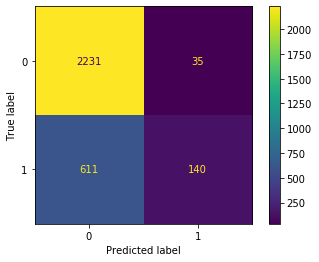

Acuracia apurada neste ciclo:  78.58800132582036
Precisao apurada neste ciclo:  98.45542806707856
Treino:  [    0     1     2 ... 30159 30160 30161]
(27145,)
Validacao:  [2971 2973 2983 ... 6067 6068 6069]
(3017,)


C:\Users\eduar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\eduar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[[2212   54]
 [ 596  155]]


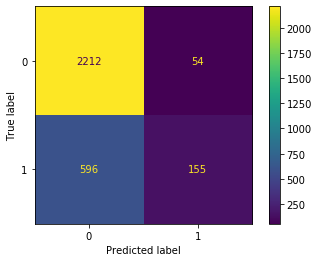

Acuracia apurada neste ciclo:  78.45541929068611
Precisao apurada neste ciclo:  97.61694616063548
Treino:  [    0     1     2 ... 30159 30160 30161]
(27146,)
Validacao:  [5892 5893 5896 ... 9099 9100 9101]
(3016,)


C:\Users\eduar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[[2242   24]
 [ 618  132]]


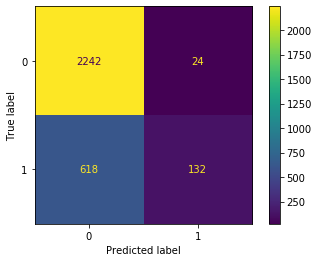

Acuracia apurada neste ciclo:  78.71352785145889
Precisao apurada neste ciclo:  98.94086496028244
Treino:  [    0     1     2 ... 30159 30160 30161]
(27146,)
Validacao:  [ 8913  8923  8929 ... 12140 12141 12142]
(3016,)


C:\Users\eduar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[[2251   15]
 [ 644  106]]


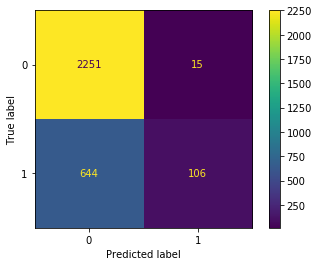

Acuracia apurada neste ciclo:  78.14986737400531
Precisao apurada neste ciclo:  99.33804060017653
Treino:  [    0     1     2 ... 30159 30160 30161]
(27146,)
Validacao:  [11840 11852 11853 ... 15163 15164 15165]
(3016,)


C:\Users\eduar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[[2175   90]
 [ 528  223]]


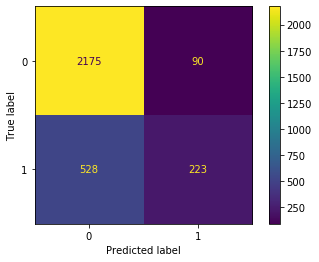

Acuracia apurada neste ciclo:  79.50928381962865
Precisao apurada neste ciclo:  96.02649006622516
Treino:  [    0     1     2 ... 30159 30160 30161]
(27146,)
Validacao:  [14871 14873 14884 ... 18178 18179 18180]
(3016,)


C:\Users\eduar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[[2133  132]
 [ 536  215]]


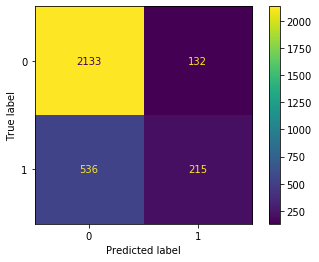

Acuracia apurada neste ciclo:  77.85145888594164
Precisao apurada neste ciclo:  94.17218543046357
Treino:  [    0     1     2 ... 30159 30160 30161]
(27146,)
Validacao:  [17790 17791 17793 ... 21142 21143 21144]
(3016,)


C:\Users\eduar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[[2216   49]
 [ 604  147]]


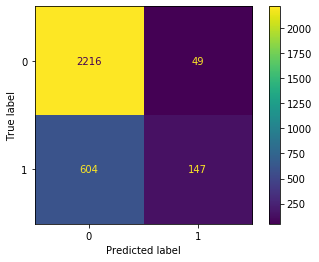

Acuracia apurada neste ciclo:  78.34880636604774
Precisao apurada neste ciclo:  97.83664459161147
Treino:  [    0     1     2 ... 30159 30160 30161]
(27146,)
Validacao:  [21008 21010 21011 ... 24203 24204 24205]
(3016,)


C:\Users\eduar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[[2236   29]
 [ 615  136]]


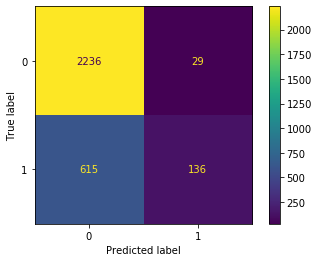

Acuracia apurada neste ciclo:  78.64721485411141
Precisao apurada neste ciclo:  98.719646799117
Treino:  [    0     1     2 ... 30159 30160 30161]
(27146,)
Validacao:  [23907 23908 23914 ... 27174 27175 27179]
(3016,)


C:\Users\eduar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[[2220   45]
 [ 599  152]]


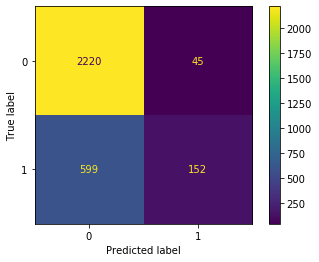

Acuracia apurada neste ciclo:  78.64721485411141
Precisao apurada neste ciclo:  98.01324503311258
Treino:  [    0     1     2 ... 27174 27175 27179]
(27146,)
Validacao:  [27036 27044 27050 ... 30159 30160 30161]
(3016,)


C:\Users\eduar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\eduar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[[2190   75]
 [ 553  198]]


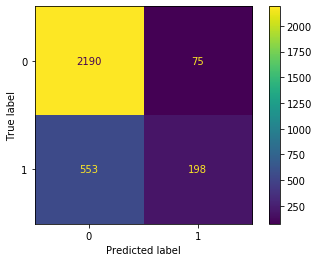

Acuracia apurada neste ciclo:  79.17771883289124
Precisao apurada neste ciclo:  96.6887417218543
--------------------------------------------------------------------------------
Tempo médio de treinamento MLP com 10 kfolds - Tempo: 578.984375 segundos.
Médias das Validações com 10 folds
Acurácia_mlp: 78.60885134547028
Precisão_mlp: 97.5808233430557


In [5]:
# Passo 4
# Agora vamos separar o data set para termos os dados de TREINO e TESTE, 
# ordenando-os de forma aleatória e garantindo que os registros selecionados
# para teste apresentem a mesma proporção que os registros de treino para 
# a 'SITUACAO' (que indica se o paciente possui ou nao diabetes) . Vamos 
# separar 80% dos registros para treino e 20% para testes. 

# Para separacao dos grupos de treino e teste usando 'train_test_split'
from sklearn.model_selection import train_test_split

# métricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

# model
from sklearn.neural_network import MLPClassifier

# validação cruzada
from sklearn.model_selection import StratifiedKFold

# matrizes numéricas e plot
import numpy as np
from matplotlib import pyplot as plt

# organiza aleatoriamente matrizes 
from sklearn.utils import shuffle

# funcao para recuperacao do timestamp
from time import process_time

# Como vamos usar 'StratifiedKFold' para separar os registros de treino e teste
# nao precisamos executar os procedimentos abaixo, que fariam o mesmo processo
# mas usando a 'train_test_split'
##SEED = 20
##treino_x, teste_x, treino_y, teste_y = train_test_split(x, 
##                                                        y,
##                                                        random_state = SEED, 
##                                                        test_size = 0.10,
##                                                        stratify = y)
##print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

# Parametros que serao usados na rede
epocas = 200

# definindo arquitetura da PMC - com duas camadas intermediárias
mlp = MLPClassifier(hidden_layer_sizes=(128,128,128,),  # 3 camadas com 128 neurônios cada
                    activation='tanh',              # 
                    max_iter=epocas,                # numero maximo de iteracoes
                    alpha=1e-4,                     # restringir o tamanho dos pesos, fator de penalidade
                    solver='lbfgs',                 # algoritmo otimizador (metodo estocastico gadiente descendente)
                    verbose=False,                  # nao imprimir mensagens de progresso 
                    tol=1e-5,                       # tolerancia para continuidade da otimizacao
                    n_iter_no_change=10,            # a otimizacao vai parar se nos ultimos 'n' resultados não houver melhora
                    random_state=1,                 # geracao de numeros aleatorios para inicializacao e pesos de bias 
                    learning_rate_init=.001)        # taxa de aprendizagem inicial

# arrays para armazenar o tempo de duracao, acuracia e precisao de cada treino
time_train_mlp =[]
acuracia_mlp = []
precisao_mlp = []

# Validação cruzada com k folds
k = 10 
skf = StratifiedKFold(n_splits=k, random_state=None)

for train_index, test_index in skf.split(x,y): 

    print("Treino: ", train_index)
    print(train_index.shape)
    print("Validacao: ", test_index) 
    print(test_index.shape)
    
    sinais_treinamento, sinais_validacao = x[train_index], x[test_index] 
    labels_treinamento, labels_validacao = y[train_index], y[test_index]
    
    # para garantir serem randomicos, mas com mesmo padrão/ordem -> 'random_state' igual
    x_treinamento, y_treinamento = shuffle(sinais_treinamento, labels_treinamento, random_state = 12)
    x_validacao, y_validacao = shuffle(sinais_validacao, labels_validacao, random_state = 12)

    # Aqui fazer um treinamento de 100 épocas (parametros da MLP)
    start = process_time()
    mlp.fit(x_treinamento, y_treinamento)
    end = process_time()
    time_mlp = end - start

    # Métricas da validacão mlp
    preds_val_mlp = mlp.predict(x_validacao)  
    cm_val_mlp = confusion_matrix(y_validacao, preds_val_mlp)
    print(cm_val_mlp)
    
    #impressao de matriz de confusao
    plot_confusion_matrix(mlp, x_validacao, y_validacao)
    plt.show() 
    
    TP = cm_val_mlp[0,0]   # True Positive
    FP = cm_val_mlp[0,1]   # False Positive
    FN = cm_val_mlp[1,0]   # False Negative 
    TN = cm_val_mlp[1,1]   # True Negative  

    acuracia_mlp_ = (TP+TN)*100/(len(y_validacao))
    precisao_mlp_ = TP*100/(TP+FP)
    print('Acuracia apurada neste ciclo: ', acuracia_mlp_)
    print('Precisao apurada neste ciclo: ', precisao_mlp_)

    # Usar no calculo das médias da mlp
    time_train_mlp.append(time_mlp)
    acuracia_mlp.append(acuracia_mlp_)
    precisao_mlp.append(precisao_mlp_)

media_time_train_mlp = sum(time_train_mlp) / float(len(time_train_mlp))
media_acuracia_mlp = sum(acuracia_mlp) / float(len(acuracia_mlp))
media_precisao_mlp = sum(precisao_mlp) / float(len(precisao_mlp))

print('--------------------------------------------------------------------------------')
print('Tempo médio de treinamento MLP com ' + str(k) + ' kfolds - Tempo: ' + str (media_time_train_mlp) + ' segundos.')
print('Médias das Validações com ' + str(k) + ' folds')
print('Acurácia_mlp: ' + str(media_acuracia_mlp))
print('Precisão_mlp: ' + str(media_precisao_mlp))



In [7]:
# Passo 06 - Exibir gráfico de perda/loss.
# Nao vamos executar pois apenas o otimizador "sgd" possui a loss function
# (e estamos usando em nossa rede o otimizador "lbfgs")

##loss_values = mlp.loss_curve_
##plt.plot(loss_values)
##plt.show()

In [8]:
from sklearn.model_selection import cross_validate
from time import process_time

start_cv = process_time()

cv_results = cross_validate(mlp, x_treinamento, y_treinamento, cv=10)

end_cv = process_time()
time_cv = end_cv - start_cv

print(start_cv)
print(end_cv)
print('Duracao da CROSS VALIDATION: '  + str (time_cv))

# Retorna a precisao media a partir dos dados (treino e teste) disponibilizados
cv_results['test_score']

C:\Users\eduar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\eduar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\eduar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\eduar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

5808.375
12209.078125
Duracao da CROSS VALIDATION: 6400.703125


C:\Users\eduar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


array([0.79005525, 0.7786372 , 0.79005525, 0.78858195, 0.78747698,
       0.77937385, 0.79476787, 0.78629329, 0.7789241 , 0.78666175])

In [9]:
from sklearn.model_selection import GridSearchCV

parameters = {'activation':('identity', 'logistic', 'tanh', 'relu'), 'tol':[1e-5, 1e-1]}

clf = GridSearchCV(mlp, parameters, cv=10)
clf.fit(x_treinamento, y_treinamento,)

C:\Users\eduar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\eduar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\eduar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\eduar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: 

C:\Users\eduar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\eduar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\eduar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check

C:\Users\eduar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\eduar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\eduar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.ht

C:\Users\eduar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\eduar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\eduar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\eduar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\eduar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\eduar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\eduar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check

GridSearchCV(cv=10,
             estimator=MLPClassifier(activation='tanh',
                                     hidden_layer_sizes=(128, 128, 128),
                                     random_state=1, solver='lbfgs',
                                     tol=1e-05),
             param_grid={'activation': ('identity', 'logistic', 'tanh', 'relu'),
                         'tol': [1e-05, 0.1]})

In [10]:
clf.cv_results_

{'mean_fit_time': array([  6.75437768,   6.65050414, 183.29364574,   1.26333535,
         83.53852835,   3.28709314,  15.76227672,  16.09497159]),
 'std_fit_time': array([ 0.11222614,  0.04838611, 33.84169521,  0.04799481, 32.75186382,
         1.97047316,  0.1974122 ,  0.34592758]),
 'mean_score_time': array([0.00708146, 0.00698154, 0.04218748, 0.0338815 , 0.02095079,
        0.01877103, 0.02886121, 0.02983954]),
 'std_score_time': array([0.00113284, 0.00077236, 0.00755638, 0.00586355, 0.00510097,
        0.00348812, 0.00299073, 0.00973972]),
 'param_activation': masked_array(data=['identity', 'identity', 'logistic', 'logistic', 'tanh',
                    'tanh', 'relu', 'relu'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_tol': masked_array(data=[1e-05, 0.1, 1e-05, 0.1, 1e-05, 0.1, 1e-05, 0.1],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?

In [11]:
clf.cv_results_['params'][clf.best_index_]

{'activation': 'tanh', 'tol': 1e-05}

<class 'numpy.ndarray'>
(15060, 13)
<class 'numpy.ndarray'>
(15060, 1)
[[10908   452]
 [ 2771   929]]


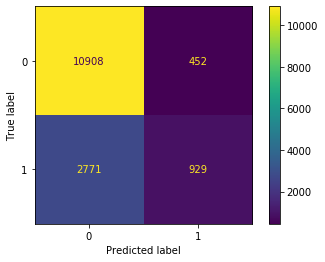

Acuracia apurada no teste:  78.59893758300133
Precisao apurada no teste:  96.02112676056338


In [12]:
# Passo 07 - Vamos importar os dados de teste e tratá-los com os mesmos
# procedimentos do dataset original e processá-lo com a rede/modelo 
# implementado no "Passo 05", imprimindo a sua Matrix de Confusao

import pandas as pd
import numpy as np
from sklearn.utils import shuffle


uri = "adult_test_without_null.csv"
#uri = "https://github.com/EduPiza/POS_IESB_FUND_IA/blob/master/adult_test_without_null.csv"
dados_input_tst = pd.read_csv(uri)
dados_input_tst.head()


# tipo emprego
converte_tipo_emprego = { "Federal-gov"      : 0,
                          "Local-gov"        : 1,
                          "Private"          : 2,
                          "Self-emp-inc"     : 3,
                          "Self-emp-not-inc" : 4,
                          "State-gov"        : 5, 
                          "Without-pay"      : 6 }

dados_input_tst['Tipo_emprego'] = dados_input_tst.Tipo_emprego.map(converte_tipo_emprego)
dados_input_tst['Tipo_emprego'] = dados_input_tst['Tipo_emprego'].astype(np.uint32)

# instrucao
converte_instrucao = { "Preschool"      : 1,
                       "1st-4th"        : 2,
                       "5th-6th"        : 3,
                       "7th-8th"        : 4,
                       "9th"            : 5,
                       "10th"           : 6, 
                       "11th"           : 7,
                       "12th"           : 8, 
                       "HS-grad"        : 9,
                       "Some-college"   : 10, 
                       "Assoc-voc"      : 11,
                       "Assoc-acdm"     : 12,
                       "Bachelors"      : 13, 
                       "Masters"        : 14, 
                       "Prof-school"    : 15,
                       "Doctorate"      : 16 }

dados_input_tst['Instrucao'] = dados_input_tst.Instrucao.map(converte_instrucao)
dados_input_tst['Instrucao'] = dados_input_tst['Instrucao'].astype(np.uint32)

# estado civil
converte_estado_civil = { "Divorced"              : 0,
                          "Married-AF-spouse"     : 1,
                          "Married-civ-spouse"    : 2,
                          "Married-spouse-absent" : 3, 
                          "Never-married"         : 4,
                          "Separated"             : 5, 
                          "Widowed"               : 6 }

dados_input_tst['Estado_civil'] = dados_input_tst.Estado_civil.map(converte_estado_civil)
dados_input_tst['Estado_civil'] = dados_input_tst['Estado_civil'].astype(np.uint8)

# ocupacao
converte_ocupacao = { "Adm-clerical"      : 0 ,
                      "Armed-Forces"      : 1 , 
                      "Craft-repair"      : 2 ,
                      "Exec-managerial"   : 3 , 
                      "Farming-fishing"   : 4 , 
                      "Handlers-cleaners" : 5 , 
                      "Machine-op-inspct" : 6 , 
                      "Other-service"     : 7 , 
                      "Priv-house-serv"   : 8 , 
                      "Prof-specialty"    : 9 , 
                      "Protective-serv"   : 10, 
                      "Sales"             : 11, 
                      "Tech-support"      : 12, 
                      "Transport-moving"  : 13 }

dados_input_tst['Ocupacao'] = dados_input_tst.Ocupacao.map(converte_ocupacao)
dados_input_tst['Ocupacao'] = dados_input_tst['Ocupacao'].astype(np.uint32)

# moradia
converte_moradia = { "Husband"        : 0,
                     "Not-in-family"  : 1,
                     "Own-child"      : 2, 
                     "Unmarried"      : 3,
                     "Wife"           : 4,
                     "Other-relative" : 5 }

dados_input_tst['Moradia'] = dados_input_tst.Moradia.map(converte_moradia)
dados_input_tst['Moradia'] = dados_input_tst['Moradia'].astype(np.uint32)

# raca
converte_raca = { "Amer-Indian-Eskimo" : 0,
                  "Asian-Pac-Islander" : 1,
                  "Black"              : 2, 
                  "White"              : 3,
                  "Other"              : 4 }

dados_input_tst['Raca'] = dados_input_tst.Raca.map(converte_raca)
dados_input_tst['Raca'] = dados_input_tst['Raca'].astype(np.uint32)

# sexo
converte_sexo = { "Female" : 0,
                  "Male"   : 1 }

dados_input_tst['Sexo'] = dados_input_tst.Sexo.map(converte_sexo)
dados_input_tst['Sexo'] = dados_input_tst['Sexo'].astype(np.uint32)

# pais origem
converte_pais_origem = { "Cambodia"                   : 0,
                         "Canada"                     : 1,
                         "China"                      : 2,
                         "Columbia"                   : 3,
                         "Cuba"                       : 4,
                         "Dominican-Republic"         : 5,
                         "Ecuador"                    : 6,
                         "El-Salvador"                : 7,
                         "England"                    : 8,
                         "France"                     : 9,
                         "Germany"                    : 10,
                         "Greece"                     : 11,
                         "Guatemala"                  : 12,
                         "Haiti"                      : 13,
                         "Holand-Netherlands"         : 14,
                         "Honduras"                   : 15,
                         "Hong"                       : 16,
                         "Hungary"                    : 17,
                         "India"                      : 18,
                         "Iran"                       : 19,
                         "Ireland"                    : 20,
                         "Italy"                      : 21,
                         "Jamaica"                    : 22,
                         "Japan"                      : 23,
                         "Laos"                       : 24,
                         "Mexico"                     : 25,
                         "Nicaragua"                  : 26,
                         "Outlying-US(Guam-USVI-etc)" : 27,
                         "Peru"                       : 28,
                         "Philippines"                : 29,
                         "Poland"                     : 30,
                         "Portugal"                   : 31,
                         "Puerto-Rico"                : 32,
                         "Scotland"                   : 33,
                         "South"                      : 34,
                         "Taiwan"                     : 35,
                         "Thailand"                   : 36,
                         "Trinadad&Tobago"            : 37,
                         "United-States"              : 38,
                         "Vietnam"                    : 39,
                         "Yugoslavia"                 : 40 }

dados_input_tst['Pais_origem'] = dados_input_tst.Pais_origem.map(converte_pais_origem)
dados_input_tst['Pais_origem'] = dados_input_tst['Pais_origem'].astype(np.uint32)

# renda             
converte_renda = { "<=50K." : 0,
                   ">50K."  : 1 }

dados_input_tst['Renda'] = dados_input_tst.Renda.map(converte_renda)

dados_input_tst.head()
dados_input_tst.tail()


dados_input_tst = shuffle(dados_input_tst)

x_tst = dados_input_tst[['Idade', 
                         'Tipo_emprego',
                         'Peso_socio_ecn',
                         'Cod_instr',
                         'Estado_civil',
                         'Ocupacao',
                         'Moradia',
                         'Raca',
                         'Sexo',
                         'Ganho_capital',
                         'Perda_capital',
                         'Horas_trab_semanais',
                         'Pais_origem']]

y_tst = dados_input_tst[['Renda']]

# Setando a tipagem do conteudo como inteiro
x_tst = x_tst.astype(np.uint32)
y_tst = y_tst.astype(np.uint8)

# convertendo de 'pandas.dataframe' para 'numpy.ndarray'
x_tst = x_tst.to_numpy(copy=True)
y_tst = y_tst.to_numpy(copy=True)

print(type(x_tst))
print(x_tst.shape)
print(type(y_tst))
print(y_tst.shape)

# Para separacao dos grupos de treino e teste usando 'train_test_split'
from sklearn.model_selection import train_test_split

# métricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

# model
from sklearn.neural_network import MLPClassifier

# validação cruzada
from sklearn.model_selection import StratifiedKFold

# matrizes numéricas e plot
import numpy as np
from matplotlib import pyplot as plt

# organiza aleatoriamente matrizes 
from sklearn.utils import shuffle

# funcao para recuperacao do timestamp
from time import process_time

# Métricas da validacão mlp
preds_val_mlp = mlp.predict(x_tst)  
cm_val_mlp = confusion_matrix(y_tst, preds_val_mlp)
print(cm_val_mlp)
    
#impressao de matriz de confusao
plot_confusion_matrix(mlp, x_tst, y_tst)
plt.show() 
    
TP = cm_val_mlp[0,0]   # True Positive
FP = cm_val_mlp[0,1]   # False Positive
FN = cm_val_mlp[1,0]   # False Negative 
TN = cm_val_mlp[1,1]   # True Negative  

acuracia_mlp_ = (TP+TN)*100/(len(y_tst))
precisao_mlp_ = TP*100/(TP+FP)
print('Acuracia apurada no teste: ', acuracia_mlp_)
print('Precisao apurada no teste: ', precisao_mlp_)
